In [2]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from Dataset import TrashDataset
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from pathlib import Path
from torchvision.transforms import v2
from Dataloader import od_collate_fn
import torch 
from tqdm.auto import tqdm

classes=['c_1','c_2_01','c_2_02','c_3',
         'c_4_01_02','c_4_02_01_02',
         'c_4_02_02_02','c_4_02_03_02','c_4_03','c_5_02',
         'c_6','c_7','c_1_01','c_2_02_01',
         'c_3_01','c_4_03_01','c_5_01_01',
         'c_5_02_01','c_6_01','c_7_01',
         'c_4_01_01','c_4_02_01_01',
         'c_4_02_02_01','c_4_02_03_01',
         'c_5_01','c_8_01','c_8_02',
         'c_8_01_01','c_9']

train_transforms = v2.Compose([
    v2.RandomHorizontalFlip(p=0.5),
    v2.Resize((224,224)),
    v2.RandomVerticalFlip(0.5)
])

test_transforms = v2.Compose([
    v2.Resize((224,224))
])


train_anno_path = Path(r'C:\Users\hyssk\MyThesisProject\307.생활폐기물 데이터 활용ㆍ환류\01-1.정식개방데이터\Training\02.라벨링데이터')
train_img_dir = Path(r'C:\Users\hyssk\MyThesisProject\307.생활폐기물 데이터 활용ㆍ환류\01-1.정식개방데이터\Training\01.원천데이터')

test_img_dir= Path(r'C:\Users\hyssk\MyThesisProject\307.생활폐기물 데이터 활용ㆍ환류\01-1.정식개방데이터\Validation\01.원천데이터')
test_anno_path= Path(r'C:\Users\hyssk\MyThesisProject\307.생활폐기물 데이터 활용ㆍ환류\01-1.정식개방데이터\Validation\02.라벨링데이터')

train_dataset = TrashDataset(classes,train_anno_path,train_img_dir,train_transforms)
train_dataloader = DataLoader(train_dataset,4,True,collate_fn=od_collate_fn)

test_dataset = TrashDataset(classes,test_anno_path,test_img_dir,test_transforms)
test_dataloader = DataLoader(test_dataset,4,4,collate_fn=od_collate_fn)

# model 
model1 = fasterrcnn_resnet50_fpn(pretrained = True)
num_classes = len(classes)+1
in_feature = model1.roi_heads.box_predictor.cls_score.in_features
model1.roi_heads.box_predictor = FastRCNNPredictor(in_feature , num_classes)


c:\Users\hyssk\anaconda3\envs\objectdetection\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\hyssk\anaconda3\envs\objectdetection\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hyssk\anaconda3\envs\objectdetection\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
optimizer=torch.optim.Adam(model1.parameters(),lr=0.001)
model1.to('cuda')
for epochs in range(5):
    epoch_loss = 0 
    for batch, target in tqdm(test_dataloader):
        loss_dict = model1(batch,target)
        loss = sum(v for v in loss_dict.values())
        epoch_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(epoch_loss)

  0%|          | 0/121 [00:00<?, ?it/s]c:\Users\hyssk\MyThesisProject\Dataset.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transformed_img, transformed_boxes = self.transform(torch.tensor(img),boxes)
c:\Users\hyssk\anaconda3\envs\objectdetection\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transform

tensor(144.4427, device='cuda:0', grad_fn=<AddBackward0>)


100%|██████████| 121/121 [00:45<00:00,  2.67it/s]


tensor(106.3380, device='cuda:0', grad_fn=<AddBackward0>)


100%|██████████| 121/121 [00:44<00:00,  2.70it/s]


tensor(95.5802, device='cuda:0', grad_fn=<AddBackward0>)


100%|██████████| 121/121 [00:44<00:00,  2.70it/s]


tensor(89.2038, device='cuda:0', grad_fn=<AddBackward0>)


100%|██████████| 121/121 [00:45<00:00,  2.67it/s]

tensor(82.0745, device='cuda:0', grad_fn=<AddBackward0>)


In [3]:
torch.save(model1.state_dict(),'best_model_fasterRCNN.h5')

In [3]:
print("Model's state_dict:")
for param_tensor in model1.state_dict():
    print(param_tensor, "\t", model1.state_dict()[param_tensor].size())

Model's state_dict:
backbone.body.conv1.weight 	 torch.Size([64, 3, 7, 7])
backbone.body.bn1.weight 	 torch.Size([64])
backbone.body.bn1.bias 	 torch.Size([64])
backbone.body.bn1.running_mean 	 torch.Size([64])
backbone.body.bn1.running_var 	 torch.Size([64])
backbone.body.layer1.0.conv1.weight 	 torch.Size([64, 64, 1, 1])
backbone.body.layer1.0.bn1.weight 	 torch.Size([64])
backbone.body.layer1.0.bn1.bias 	 torch.Size([64])
backbone.body.layer1.0.bn1.running_mean 	 torch.Size([64])
backbone.body.layer1.0.bn1.running_var 	 torch.Size([64])
backbone.body.layer1.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
backbone.body.layer1.0.bn2.weight 	 torch.Size([64])
backbone.body.layer1.0.bn2.bias 	 torch.Size([64])
backbone.body.layer1.0.bn2.running_mean 	 torch.Size([64])
backbone.body.layer1.0.bn2.running_var 	 torch.Size([64])
backbone.body.layer1.0.conv3.weight 	 torch.Size([256, 64, 1, 1])
backbone.body.layer1.0.bn3.weight 	 torch.Size([256])
backbone.body.layer1.0.bn3.bias 	 torch.Size([25

In [4]:
model1.load_state_dict(torch.load(r'C:\Users\hyssk\MyThesisProject\best_model_2.h5'))
model1.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:
import torch
import torchvision
from torchvision.transforms.functional import convert_image_dtype
from torchvision import tv_tensors
from tqdm.auto import tqdm
from warnings import filterwarnings
from matplotlib import font_manager, rc
from torchvision.utils import draw_bounding_boxes
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from torchvision.transforms import v2
filterwarnings('ignore')
font_path = "c:\WINDOWS\Fonts\GULIM.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rc('font', size=12) 

tensor([0.5404, 0.5168, 0.4026, 0.2287, 0.2219, 0.1453, 0.1442, 0.1434, 0.1392,
        0.1159, 0.1013, 0.0933, 0.0905, 0.0871, 0.0864, 0.0777, 0.0732, 0.0727,
        0.0723, 0.0700, 0.0700, 0.0694, 0.0689, 0.0653, 0.0599, 0.0598, 0.0584,
        0.0547])
tensor([[ 38.2980,  67.9459,  63.7493, 131.0604],
        [ 58.8166,  28.7777,  85.6267,  86.7014],
        [ 45.6220,  53.4743,  76.4991, 117.9245],
        [ 57.1396,  42.3516,  80.6645, 111.0333],
        [ 51.1470,  21.2906,  87.1219, 117.5744],
        [ 46.6952,  56.2449,  75.7891, 119.1974],
        [ 39.4208,  70.6935,  67.6296, 134.6042],
        [ 38.4946,  59.5635,  73.5420, 128.7186],
        [ 57.9363,  32.8459,  83.6785, 102.9905],
        [ 53.4901,  30.2594,  85.1535, 107.8854],
        [ 65.1603,  32.3910,  82.2490,  53.4747],
        [ 63.8213,  29.4725,  83.8860,  57.2553],
        [ 37.7645,  62.0483,  74.6688, 133.3416],
        [ 62.0784,  30.4531,  84.0216,  64.2868],
        [ 37.5806,  79.4217,  58.7879, 130.

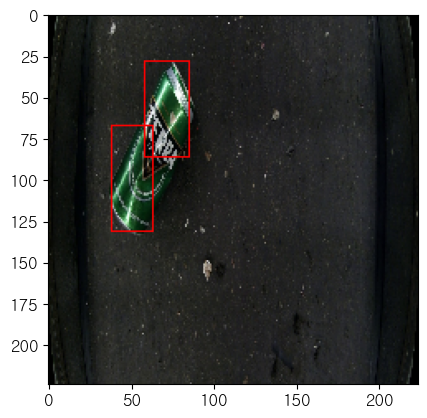

In [23]:
with torch.inference_mode():
    model1.eval()
    model1.to('cpu')
    img,_ = next(iter(test_dataloader))
    x = model1(img)
print(x[0]['scores'])
print(x[0]['boxes'])
plt.figure()
plt.imshow(draw_bounding_boxes(convert_image_dtype(img[0],dtype= torch.uint8),x[0]['boxes'][x[0]['scores']>0.5],colors='red').permute(1,2,0))
plt.show()